In [79]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset 
combined_df= pd.merge(study_results, mouse_metadata, on= 'Mouse ID', how= 'left' )
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#mean
stat_summary_df = combined_df.groupby(['Drug Regimen'])
output_mean=stat_summary_df['Tumor Volume (mm3)'].mean()
output_df = pd.DataFrame(output_mean)
output_df = output_df.reset_index()

#median
med_data=stat_summary_df.median()['Tumor Volume (mm3)']
med_df=pd.DataFrame(med_data).reset_index()
med_df=pd.merge(med_df,output_df,on='Drug Regimen', how = 'left')

#variance
var_data=stat_summary_df.var()['Tumor Volume (mm3)']
var_df= pd.DataFrame(var_data).reset_index()
var_df=pd.merge(var_df,med_df,on='Drug Regimen', how = 'left')

#std 
std_data=stat_summary_df.std()['Tumor Volume (mm3)']
std_df=pd.DataFrame(std_data).reset_index()
std_df=pd.merge(std_df,var_df,on='Drug Regimen',how='left')


#sem
sem_data=stat_summary_df.sem()['Tumor Volume (mm3)']
new_df = pd.DataFrame(sem_data).reset_index()
tumor_df1= pd.merge(new_df,std_df,on='Drug Regimen',how ='left')
tumor_df1.head()


#rename
column_name=['Drug Regimen','Tumor Volume Std Error','Tumor Vol Std Dev', 'Tumor Volume Var', 'Median Tumor Volume', 'Mean Tumor Volume']
tumor_df1.columns= column_name
tumor_df1.head()
#tumor_df.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Std Err','Tumor Volume (mm3)_y':'Mean Tumor Volume','Tumor Volume (mm3)':'Median Tumor Volume'},inplace=True)

tumor_df1.head()


,Drug Regimen,Tumor Volume Std Error,Tumor Vol Std Dev,Tumor Volume Var,Median Tumor Volume,Mean Tumor Volume
0,Capomulin,0.329346,4.994774,24.947764,41.557809,40.675741
1,Ceftamin,0.469821,6.268188,39.290177,51.776157,52.591172
2,Infubinol,0.492236,6.567243,43.128684,51.820584,52.884795
3,Ketapril,0.603860,8.279709,68.553577,53.698743,55.235638
4,Naftisol,0.596466,8.134708,66.173479,52.509285,54.331565


<IPython.core.display.Javascript object>


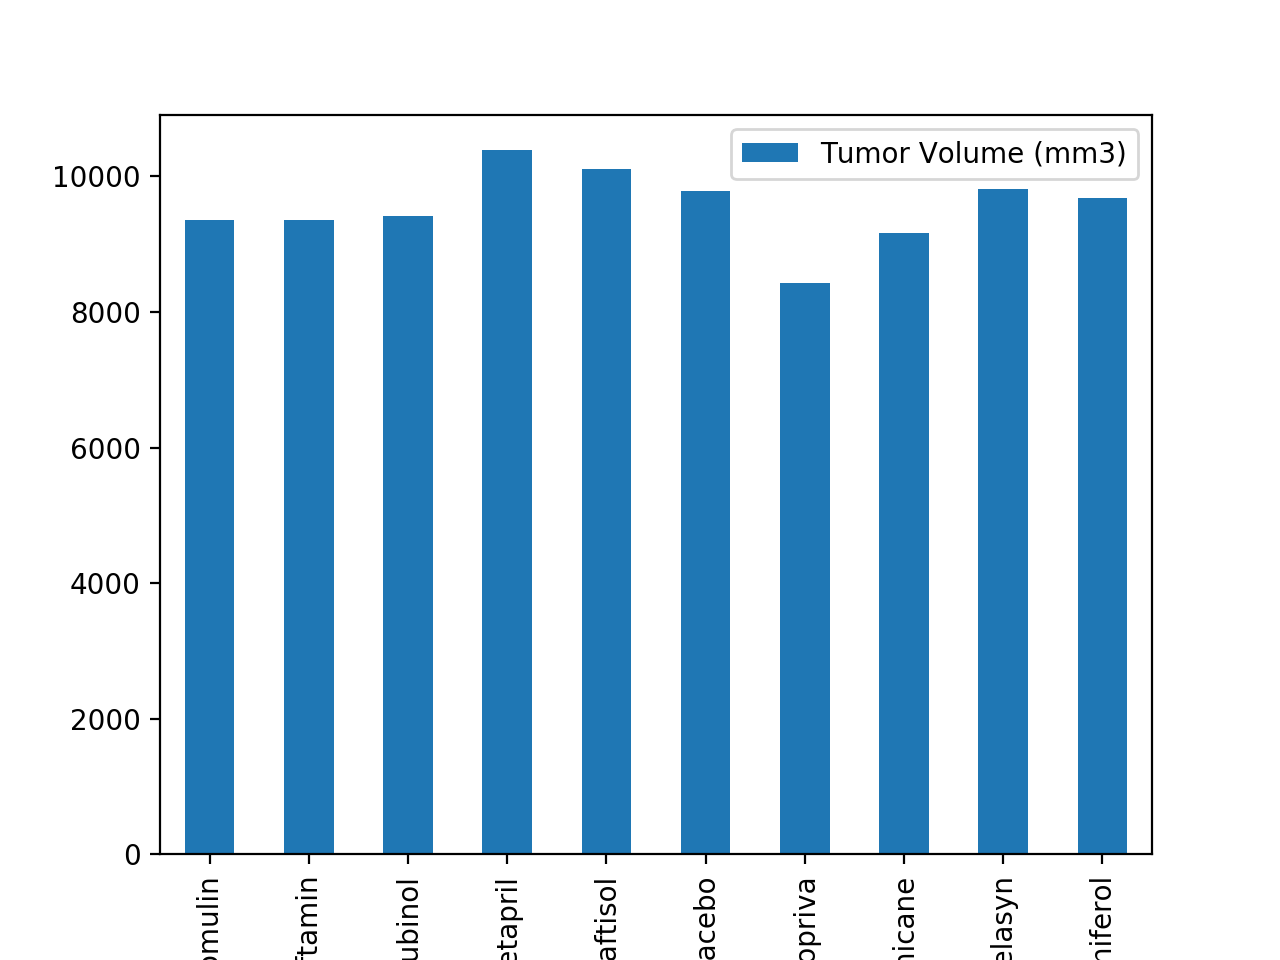

In [108]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

scatter_plot = combined_df[['Drug Regimen','Tumor Volume (mm3)']]
scatter_plot.head()
drug_group=scatter_plot.groupby('Drug Regimen')
drug_group.size()
drug_total=drug_group.sum()
#drug_total.sort(column='Mean Tumor Volume').head()
drug_total.plot(kind='bar')




In [89]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas 

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 

In [109]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 
#weight_volume= pd.merge(combined_df, tumor_df1, on= 'Drug Regimen', how= 'left' )
#weight_volume

#combined_df.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',color='red'[combined_df['Drug Regimen'].isin(['Capomulin'])==True])
#combined_df

scatter_plot = tumor_df1[['Drug Regimen','Mean Tumor Volume']]
scatter_plot.head()
drug_group=scatter_plot.groupby('Drug Regimen')
drug_group.size()
drug_total=drug_group.sum()
#drug_total.sort(column='Mean Tumor Volume').head()
drug_total.plot.scatter


<bound method PlotAccessor.scatter of <pandas.plotting._core.PlotAccessor object at 0x1a42a9b510>>

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 